In [1]:
#Description: this program uses an artificial neaural network called Long Short Term Memory (LSTM)
#             to predict the closing stock price of a corporation using the past 60 day stock price.

In [4]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
!pip install --upgrade pandas
!pip install --upgrade pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540047
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607436
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747406
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880667
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860235
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.426834
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.596107
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.501358


In [6]:
#get the number of rows and columns
df.shape

(2003, 6)

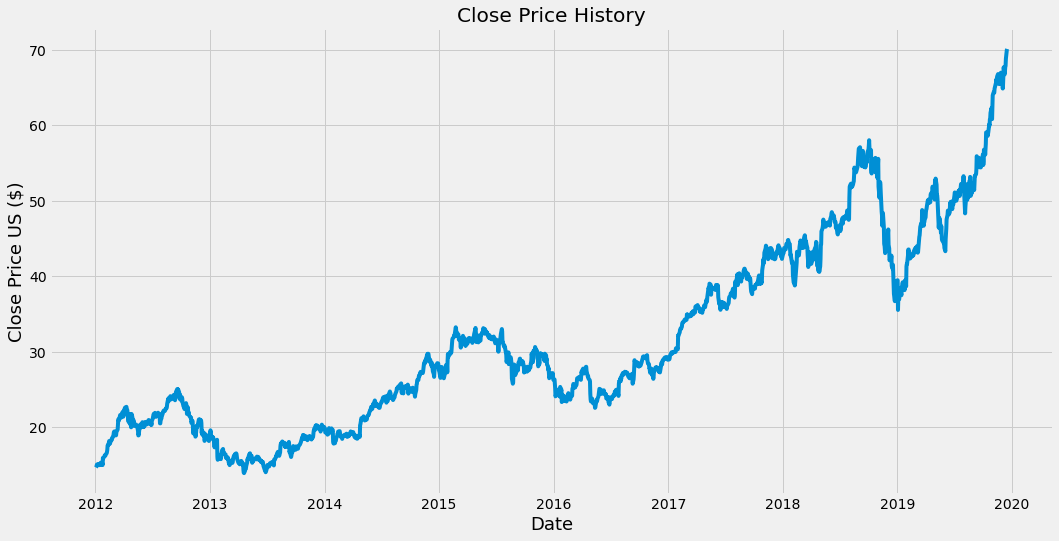

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price US ($)', fontsize=18)
plt.show()

In [8]:
#Create new data frame with only 'Close Column'
data = df.filter(['Close'])
#Convert dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1603

In [ ]:
#Scale the data
Scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)